# 0. Overview

- Objectives
  - The goal is to get an average score of +13 over 100 consecutive episodes.
- Applied algorithms
  - Deep Q networks with Replay Memory
  - Double Deep Q networks
  - Dueling Network Architecture

# 1. Setup the environment
- Prepare unity environment with Banana
- Import required libraries
- Import network

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

from src.DQNAgent import Agent

# 2.  Get the default brain

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# 3. Set hyperparameters

In [3]:
train_episodes = 3000     

#Environment parameters
state_size = 37
action_size = 4

#DQN parameters
learning_rate = 1e-3
gamma = 0.95                   
hidden_size = 150
update_every = int(1e4)
tau = 1e-3

#Exploration parameters
explore_stop = 1e-2            
decay_rate = 1e-5

#Memory parameters
memory_size = int(1e6)
batch_size = 32

# 4. Train

Ep 50	In 100 episodes, Average Scores: 0.098	Max Score: 3.0	Min Score: -3.0	loss: 0.00768	ex_p: 0.86	time: 62.90
Ep 100	In 100 episodes, Average Scores: 0.380	Max Score: 5.0	Min Score: -3.0	loss: 0.02426	ex_p: 0.74	time: 67.77
Ep 150	In 100 episodes, Average Scores: 0.870	Max Score: 5.0	Min Score: -2.0	loss: 0.01834	ex_p: 0.64	time: 71.41
Ep 200	In 100 episodes, Average Scores: 1.840	Max Score: 8.0	Min Score: -2.0	loss: 0.01348	ex_p: 0.55	time: 77.34
Ep 250	In 100 episodes, Average Scores: 3.320	Max Score: 9.0	Min Score: -2.0	loss: 0.01386	ex_p: 0.48	time: 82.34
Ep 300	In 100 episodes, Average Scores: 4.290	Max Score: 11.0	Min Score: -1.0	loss: 0.01410	ex_p: 0.41	time: 92.12
Ep 350	In 100 episodes, Average Scores: 5.320	Max Score: 12.0	Min Score: 0.0	loss: 0.01211	ex_p: 0.36	time: 94.74
Ep 400	In 100 episodes, Average Scores: 6.480	Max Score: 15.0	Min Score: -1.0	loss: 0.01408	ex_p: 0.31	time: 99.77
Ep 450	In 100 episodes, Average Scores: 7.030	Max Score: 16.0	Min Score: -2.0	loss: 0.0

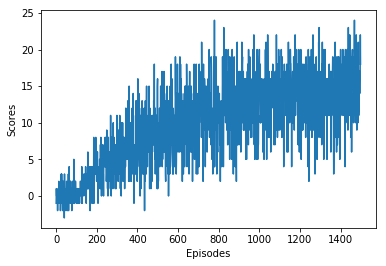

In [4]:
tf.reset_default_graph()
with tf.device("/device:GPU:0"):    
    agent = Agent(state_size, action_size, hidden_size, memory_size, batch_size, explore_stop, decay_rate, gamma, learning_rate, tau, update_every)

save_file = 'model/p1_dqn.ckpt'
saver = tf.train.Saver()

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    
    agent.set_session(sess)    
    agent.hard_update()
       
    scores = []
    start = time.time()
    for ep in range(train_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        agent.reset()

        score = 0
        while True: 
            action, ex_p = agent.act(state, True)

            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]            
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            score += reward
                        
            agent.step(state, action, reward, next_state, done)
            
            if done:
                break
            
            state = next_state
            
        scores.append(score)
        if ep > 0 and ep % 50 == 0:
            print("Ep {}\tIn 100 episodes, Average Scores: {:.3f}\tMax Score: {}\tMin Score: {}\tloss: {:.5f}\tex_p: {:.2f}\ttime: {:.2f}"
                  .format(ep, np.mean(scores[-100:]), np.max(scores[-100:]), np.amin(scores[-100:]), np.mean(agent.loss), ex_p, time.time() - start))
            start = time.time()
        
        if np.mean(scores[-100:]) > 15.0:
            saver.save(sess, save_file)
            print("Environment solved in {} episodes, Average Scores: {}".format(ep+1, np.mean(scores[-100:])))
            break
            
fig = plt.figure()
fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.show()            

# 5. Validation

INFO:tensorflow:Restoring parameters from model/p1_dqn.ckpt


Ep: 1, Score: 16.0
Ep: 2, Score: 14.0
Ep: 3, Score: 12.0
Ep: 4, Score: 16.0
Ep: 5, Score: 14.0
Ep: 6, Score: 13.0
Ep: 7, Score: 21.0
Ep: 8, Score: 17.0
Ep: 9, Score: 15.0
Ep: 10, Score: 9.0
Ep: 11, Score: 19.0
Ep: 12, Score: 13.0
Ep: 13, Score: 15.0
Ep: 14, Score: 15.0
Ep: 15, Score: 17.0
Ep: 16, Score: 15.0
Ep: 17, Score: 19.0
Ep: 18, Score: 17.0
Ep: 19, Score: 14.0
Ep: 20, Score: 12.0
Ep: 21, Score: 9.0
Ep: 22, Score: 12.0
Ep: 23, Score: 16.0
Ep: 24, Score: 14.0
Ep: 25, Score: 17.0
Ep: 26, Score: 16.0
Ep: 27, Score: 11.0
Ep: 28, Score: 11.0
Ep: 29, Score: 11.0
Ep: 30, Score: 9.0
Ep: 31, Score: 15.0
Ep: 32, Score: 12.0
Ep: 33, Score: 16.0
Ep: 34, Score: 16.0
Ep: 35, Score: 18.0
Ep: 36, Score: 19.0
Ep: 37, Score: 17.0
Ep: 38, Score: 10.0
Ep: 39, Score: 15.0
Ep: 40, Score: 9.0
Ep: 41, Score: 19.0
Ep: 42, Score: 16.0
Ep: 43, Score: 14.0
Ep: 44, Score: 13.0
Ep: 45, Score: 14.0
Ep: 46, Score: 11.0
Ep: 47, Score: 9.0
Ep: 48, Score: 16.0
Ep: 49, Score: 10.0
Ep: 50, Score: 13.0
Ep: 51, Score:

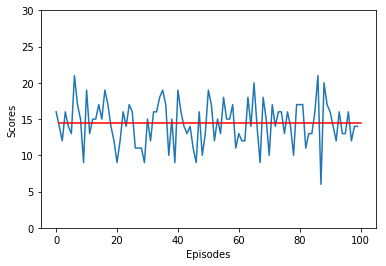

Average score: 14.42


In [4]:
tf.reset_default_graph()
with tf.device("/device:GPU:0"):    
    trained_agent = Agent(state_size, action_size, hidden_size, memory_size, batch_size, explore_stop, decay_rate, gamma, learning_rate, tau, update_every)

saver = tf.train.Saver()
save_file = 'model/p1_dqn.ckpt'

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    saver.restore(sess, save_file)
    
    trained_agent.set_session(sess)        
    
    scores = []
    for ep in range(1, 101):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        score = 0                                          # initialize the score        
        while True:
            action = trained_agent.act(state, False)
            
            env_info = env.step(action)[brain_name]
            state = env_info.vector_observations[0]            
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            score += reward
            
            if done:
                break
                                    
        scores.append(score)            
        print("Ep: {}, Score: {}".format(ep, score))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.ylim(0, 30)
x = np.arange(1, len(scores)+1)
ax.plot(x, np.ones_like(x) * np.mean(scores), color='red')
plt.show()  
print("Average score: {}".format(np.mean(scores)))    

In [8]:
env.close()